# 3. Train_NN

**Tensorboard**
- Input at command: tensorboard --logdir=./log
- Input at browser: http://127.0.0.1:6006

In [1]:
import time
import os
import pandas as pd

project_name = 'SceneClassification'
step_name = 'Train_NN'
time_str = time.strftime("%Y%m%d_%H%M%S", time.localtime())
run_name = project_name + '_' + step_name + '_' + time_str
print('run_name: ' + run_name)

cwd = os.getcwd()
model_path = os.path.join(cwd, 'model')
print('model_path: ' + model_path)

run_name: SceneClassification_Train_NN_20171028_232608
model_path: E:\SceneClassification\model


In [2]:
test_images = os.listdir(os.path.join(cwd, 'input', 'data_test_a', 'test'))
print(test_images[0:10])

['00002ff812f48a3df27c321d517a6300ed8da0c3.jpg', '00049a860dca2af378faeb0ee6f435c6063818ef.jpg', '0011a9c9216c3763ffc33641a8ffc975127dc404.jpg', '0045a44cacc7bc9826db9b54d2dcd70b810250f9.jpg', '004b6823145471c6a4ce292e864909fde2d04969.jpg', '0056e4d54eee781117c9d407d03ebf7192126b1f.jpg', '005763f88b25b18ae524b25afcce960403665383.jpg', '005b5444df96e3a155f2a73a8dccc0267e118413.jpg', '005c6ba205a246d0d3c8f73adfd4398b8e483962.jpg', '005de85662d754f98a1476a37b189902800ace91.jpg']


In [3]:
import h5py
import numpy as np
from sklearn.utils import shuffle
np.random.seed(2017)

x_train = []
y_train = {}
x_val = []
y_val = {}
x_test = []

cwd = os.getcwd()
feature_cgg16 = os.path.join(cwd, 'model', 'feature_VGG16_{}.h5'.format(171023))
feature_cgg19 = os.path.join(cwd, 'model', 'feature_VGG19_{}.h5'.format(171023))
feature_resnet50 = os.path.join(cwd, 'model', 'feature_ResNet50_{}.h5'.format(171023))
feature_mobilenet = os.path.join(cwd, 'model', 'feature_MobileNet_{}.h5'.format(171023))
feature_xception = os.path.join(cwd, 'model', 'feature_Xception_{}.h5'.format(171023))
feature_inception = os.path.join(cwd, 'model', 'feature_InceptionV3_{}.h5'.format(171023))
feature_resnetv2 = os.path.join(cwd, 'model', 'feature_ResNetV2_{}.h5'.format(171023))
for filename in [feature_cgg16, feature_cgg19, feature_resnet50, feature_mobilenet, feature_xception, feature_inception, feature_resnetv2]:
    with h5py.File(filename, 'r') as h:
        x_train.append(np.array(h['train']))
        y_train = np.array(h['train_label'])
        x_val.append(np.array(h['val']))
        y_val = np.array(h['val_label'])
        x_test.append(np.array(h['test']))

# print(x_train[0].shape)
x_train = np.concatenate(x_train, axis=-1)
# y_train = np.concatenate(y_train, axis=0)
x_val = np.concatenate(x_val, axis=-1)
# y_val = np.concatenate(y_val, axis=0)
x_test = np.concatenate(x_test, axis=-1)
print(x_train.shape)
print(x_train.shape[1:])

print(len(y_train))
print(x_val.shape)
print(len(y_val))
print(x_test.shape)

(53879, 8192)
(8192,)
53879
(7120, 8192)
7120
(7040, 8192)


In [4]:
# x_train, y_train = shuffle(x_train, y_train)
print(x_train.shape)
print(y_train.shape)

(53879, 8192)
(53879,)


In [5]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
print(y_train.shape)
print(y_val.shape)

Using TensorFlow backend.


(53879, 80)
(7120, 80)


In [6]:
from keras.models import *
from keras.layers import *
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(8192, input_shape=x_train.shape[1:]))
model.add(Dropout(0.5))
model.add(Dense(8192, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(2048, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(80, activation='softmax'))

model.compile(optimizer=Adam(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
from keras.callbacks import TensorBoard

log_path = os.path.join(model_path, run_name)
print('log_dir:' + log_path)

from keras.callbacks import TensorBoard, LearningRateScheduler
# annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x) # Do not why, when add annealer, the net will be divergency
tensorBoard = TensorBoard(log_dir=log_path)

log_dir:E:\SceneClassification\model\SceneClassification_Train_NN_20171028_232608


In [8]:
hist = model.fit(x_train, y_train,
                 batch_size=1024,
                 epochs=50, #Increase this when not on Kaggle kernel
                 verbose=1,  #1 for ETA, 0 for silent
                 validation_data=(x_val, y_val), 
                 callbacks=[tensorBoard])

Train on 53879 samples, validate on 7120 samples
Epoch 1/50
53879/53879 [==============================] - 17s - loss: 4.1484 - acc: 0.0622 - val_loss: 3.3622 - val_acc: 0.2837
Epoch 2/50
53879/53879 [==============================] - 15s - loss: 3.2741 - acc: 0.2232 - val_loss: 2.5609 - val_acc: 0.4562
Epoch 3/50
53879/53879 [==============================] - 15s - loss: 2.6679 - acc: 0.3582 - val_loss: 2.0378 - val_acc: 0.5532
Epoch 4/50
53879/53879 [==============================] - 15s - loss: 2.2462 - acc: 0.4549 - val_loss: 1.6923 - val_acc: 0.6059
Epoch 5/50
53879/53879 [==============================] - 15s - loss: 1.9433 - acc: 0.5206 - val_loss: 1.4619 - val_acc: 0.6426
Epoch 6/50
53879/53879 [==============================] - 15s - loss: 1.7202 - acc: 0.5714 - val_loss: 1.3088 - val_acc: 0.6728
Epoch 7/50
53879/53879 [==============================] - 15s - loss: 1.5563 - acc: 0.6096 - val_loss: 1.2175 - val_acc: 0.6899
Epoch 8/50
53879/53879 [==============================]

In [9]:
final_loss, final_acc = model.evaluate(x_val, y_val, verbose=0)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

Final loss: 0.9050, final accuracy: 0.7625


In [10]:
val_preds = model.predict(x_val)
print(val_preds.shape)
print(y_val.shape)

(7120, 80)
(7120, 80)


In [11]:
from sklearn.metrics import log_loss, accuracy_score

print('Val log_loss: {}'.format(log_loss(y_val, val_preds)))
val_proba_limited = np.clip(val_preds, 0.005, 0.995)
print('Val limited log_loss: {}'.format(log_loss(y_val, val_proba_limited)))

Val log_loss: 0.9049716983075761
Val limited log_loss: 1.1457020616179772


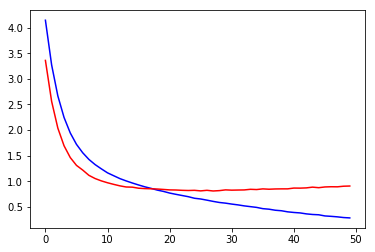

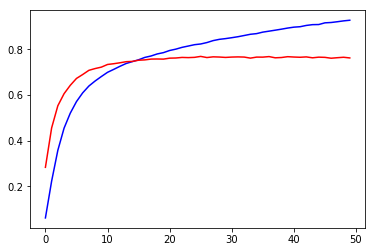

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(hist.history['loss'], color='b')
plt.plot(hist.history['val_loss'], color='r')
plt.show()
plt.plot(hist.history['acc'], color='b')
plt.plot(hist.history['val_acc'], color='r')
plt.show()

## Output

In [13]:
run_name0 = run_name + '_' + str(int(final_acc*10000))
print('run_name: ' + run_name0)

run_name: SceneClassification_Train_NN_20171028_232608_7625


In [14]:
def saveModel(model, run_name):
    cwd = os.getcwd()
    modelPath = os.path.join(cwd, 'model')
    if not os.path.isdir(modelPath):
        os.mkdir(modelPath)
    weigthsFile = os.path.join(modelPath, run_name + '.h5')
    model.save(weigthsFile)
saveModel(model, run_name0)

In [15]:
print(run_name0)
print('Done !')

SceneClassification_Train_NN_20171028_232608_7625
Done !
